In [1]:
import pandas as pd
import numpy as np

In [2]:
!gdown --id 1plvZ7poGmKX2YWgEUyuaAkjcb7ZvNVS-

Downloading...
From: https://drive.google.com/uc?id=1plvZ7poGmKX2YWgEUyuaAkjcb7ZvNVS-
To: /content/bank-test-case-ds.csv
4.35MB [00:00, 69.4MB/s]


In [3]:
df = pd.read_csv('/content/bank-test-case-ds.csv',sep=';')

In [4]:
df.head()

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.0,22,104.12,130068.80,8,756.09,31,0,36,10000.0,10000,196,0.0,2017-07-23,0.0,728319,320464,1
1,0.0,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.0,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1
3,0.0,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,10000,7,0.0,2017-07-23,0.0,728447,320533,1
4,12298.0,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,5000,20,0.0,2017-07-23,0.0,728421,298598,1


In [ ]:
#Переменные, характеризующие кредитную историю клиента: 
# closed_cred_sum - сумма, которую клиент выплатил по ранее взятым и закрытым кредитам
# closed_creds - количество закрытых кредитов
# active_cred_sum_overdue - суммарная задолженность по активным кредитам
# active_cred_sum - сумма всех активных кредитов
# active_cred_day_overdue - суммарная просрочка в днях по всем активным кредитам
# active_cred_max_overdue - максимальная сумма просроченной задолженности по активным кредитам

#Переменные характеризующие клиента:
# age - возраст
# gender - пол
# region - регион
# month_income - ежемесячный доход

#Переменные, характеризующие кредит, по которому нужно сделать прогноз:
# first_loan - сумма, которую клиент хочет получить в кредит (из заявки)
# first_days_quant - срок, на которую клиент хочет взять кредит
# loan_cost_all - одобренная клиенту сумма кредита
# order_date - дата подачи заявки на получение кредита
# cost_all - сумма всех выплат по одобренному кредиту
# order_id - id заявки
# client_id - id клиента

#Целевая переменная:
#expert - решение, которое принято по заявке (0 - одобрено, 1 - отклонено)

In [6]:
df['expert'].value_counts(normalize=True)

1    0.749265
0    0.250735
Name: expert, dtype: float64

In [8]:
df.isnull().mean()

closed_cred_sum            0.00000
closed_creds               0.00000
active_cred_sum_overdue    0.00000
active_cred_sum            0.00000
active_cred_day_overdue    0.00000
active_cred_max_overdue    0.00000
age                        0.00000
gender                     0.00000
region                     0.00000
first_loan                 0.00038
loan_cost_all              0.00000
first_days_quant           0.00000
month_income               0.00000
order_date                 0.00000
cost_all                   0.00000
order_id                   0.00000
client_id                  0.00000
expert                     0.00000
dtype: float64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   closed_cred_sum          50001 non-null  float64
 1   closed_creds             50001 non-null  int64  
 2   active_cred_sum_overdue  50001 non-null  float64
 3   active_cred_sum          50001 non-null  float64
 4   active_cred_day_overdue  50001 non-null  int64  
 5   active_cred_max_overdue  50001 non-null  float64
 6   age                      50001 non-null  int64  
 7   gender                   50001 non-null  object 
 8   region                   50001 non-null  object 
 9   first_loan               49982 non-null  float64
 10  loan_cost_all            50001 non-null  int64  
 11  first_days_quant         50001 non-null  int64  
 12  month_income             50001 non-null  float64
 13  order_date               50001 non-null  object 
 14  cost_all              

In [9]:
df[['gender','region']] = df[['gender','region']].astype(str)

In [10]:
from copy import deepcopy

train = deepcopy(df.sample(frac=0.7,random_state=42))
val = deepcopy(df[~df.index.isin(train.index)])

print((len(train) + len(val))==len(df))

True


In [12]:
%%capture
! pip install catboost

In [13]:
from catboost import CatBoostClassifier

In [48]:
X_col = [
         'closed_cred_sum', 
         'closed_creds', 
         'active_cred_sum_overdue',
          'active_cred_sum', 
         'active_cred_day_overdue', 
         'active_cred_max_overdue',
         'age',  
         'first_loan',
         'first_days_quant', 
         'month_income',
         'client_id',
          # 'gender', 
          'region',
       ]

# cat_features = ['gender','region']
y_col = ['expert']

In [49]:
model = CatBoostClassifier(verbose=100,
                           random_state=42,
                           learning_rate=0.5,
                           early_stopping_rounds=200,
                           eval_metric='AUC',
                          #  cat_features=cat_features
                           )

In [50]:
model.fit(train[X_col],train[y_col], eval_set=(val[X_col],val[y_col]))

0:	test: 0.8697650	best: 0.8697650 (0)	total: 19.8ms	remaining: 19.8s
100:	test: 0.9437977	best: 0.9437977 (100)	total: 1.97s	remaining: 17.5s
200:	test: 0.9471362	best: 0.9472449 (195)	total: 3.93s	remaining: 15.6s
300:	test: 0.9490320	best: 0.9490323 (299)	total: 5.88s	remaining: 13.7s
400:	test: 0.9500486	best: 0.9501446 (379)	total: 7.82s	remaining: 11.7s
500:	test: 0.9510186	best: 0.9510186 (500)	total: 9.74s	remaining: 9.7s
600:	test: 0.9509964	best: 0.9511615 (525)	total: 11.7s	remaining: 7.74s
700:	test: 0.9514550	best: 0.9515888 (685)	total: 13.6s	remaining: 5.82s
800:	test: 0.9517509	best: 0.9517645 (791)	total: 15.5s	remaining: 3.85s
900:	test: 0.9517586	best: 0.9519394 (828)	total: 17.5s	remaining: 1.92s
999:	test: 0.9518916	best: 0.9519698 (914)	total: 19.3s	remaining: 0us

bestTest = 0.9519698186
bestIteration = 914

Shrink model to first 915 iterations.


In [51]:
fi = pd.DataFrame({'w':model.feature_importances_,'name':X_col})
fi.sort_values('w',ascending=False)

,w,name
10,12.751630,client_id
8,12.324759,first_days_quant
9,10.399796,month_income
3,8.570999,active_cred_sum
0,8.529595,closed_cred_sum
6,7.646239,age
5,7.126897,active_cred_max_overdue
2,6.948925,active_cred_sum_overdue
11,6.804715,region
1,6.554766,closed_creds


In [60]:
val['score'] = model.predict_proba(val[X_col])[:,1]

In [61]:
val.head()

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert,score
2,51356.0,2,3000.0,3000.0,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1,0.999950
5,786916.0,11,0.0,1063763.0,0,10395.39,47,0,38,10000.0,5500,14,50000.0,2017-07-23,0.0,728526,320564,0,0.015955
9,0.0,0,21143.0,21143.0,1016,10924.00,28,1,0,10000.0,10000,90,0.0,2017-07-23,0.0,728454,123851,1,1.000000
10,0.0,0,21143.0,21143.0,1016,10924.00,28,1,0,10000.0,10000,15,30000.0,2017-07-23,0.0,728553,123851,1,0.999698
12,0.0,0,0.0,8000.0,0,0.00,24,1,80,7000.0,7000,10,35000.0,2017-07-23,0.0,728476,320544,1,0.995253


In [63]:
from sklearn.metrics import roc_auc_score, roc_curve

In [64]:
roc_auc_score(val['expert'],val['score'])

0.9519698186092109

In [65]:
fpr, tpr, thr = roc_curve(val['expert'],val['score'])

In [66]:
roc = pd.DataFrame({'fpr':fpr,'tpr':tpr,'thr':thr})

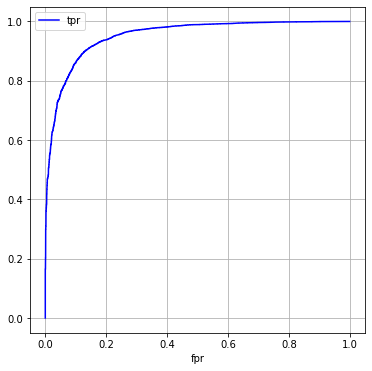

In [87]:
roc.plot(x='fpr',y='tpr',figsize=(6,6),grid=True, color='blue')

In [68]:
roc['tpr-fpr'] = roc['tpr'] - roc['fpr']

In [69]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [70]:
best_thr = roc.sort_values('tpr-fpr',ascending=False)['thr'].iloc[0]

In [71]:
val['y_pred'] = (val['score'] >= best_thr)*1

In [72]:
from sklearn.metrics import confusion_matrix, classification_report

In [73]:
print(classification_report(val['expert'],val['y_pred']))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81      3835
           1       0.95      0.90      0.93     11165

    accuracy                           0.89     15000
   macro avg       0.85      0.89      0.87     15000
weighted avg       0.90      0.89      0.89     15000



In [74]:
confusion_matrix(val['expert'],val['y_pred'])

array([[ 3342,   493],
       [ 1123, 10042]])

In [75]:
tn, fp, fn, tp = confusion_matrix(val['expert'],val['y_pred']).ravel()

In [76]:
print(fn)

1123


In [77]:
print(fp)

493


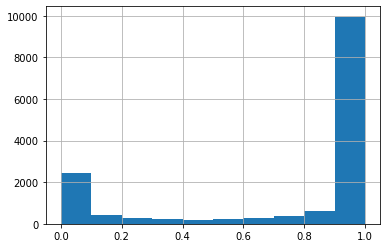

In [78]:
val['score'].hist()